In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision.transforms.v2 as v2

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
# set image and csv file  path
project_path = os.getcwd()
image_path = os.path.join(project_path, 'images')
csv_path = os.path.join(project_path, 'gt-1.csv')

In [5]:
# read  images from folder
files = os.listdir(image_path)
sample_file = cv2.imread(os.path.join(image_path, files[0]))

In [6]:
type(sample_file), sample_file.shape

(numpy.ndarray, (647, 647, 3))

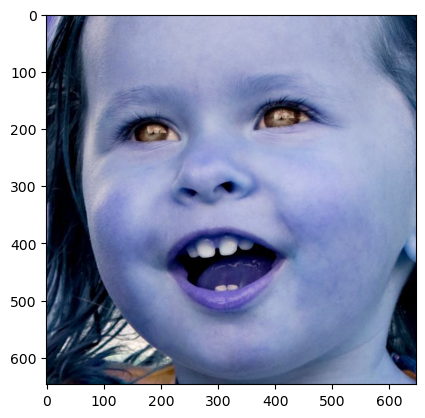

In [7]:
plt.imshow(sample_file)

In [8]:
# read the csv file for features

features_df = pd.read_csv(csv_path)
features_df

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,00000.jpg,51,51,127,60,169,65,203,52,68,...,193,84,156,144,92,174,140,180,168,179
1,00001.jpg,21,20,36,18,57,19,80,25,23,...,78,33,43,46,31,61,45,66,60,65
2,00002.jpg,23,116,39,83,47,57,56,19,36,...,62,31,91,86,106,122,115,100,121,81
3,00003.jpg,29,18,63,25,84,32,105,34,38,...,95,45,72,71,46,83,63,87,75,89
4,00004.jpg,31,53,76,44,107,38,136,33,40,...,129,49,111,105,72,137,106,132,126,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,05995.jpg,22,31,41,25,80,25,100,25,30,...,97,42,69,70,47,92,58,95,75,89
5996,05996.jpg,31,37,39,37,59,28,98,17,36,...,109,34,84,70,70,104,87,106,90,104
5997,05997.jpg,21,33,41,33,83,30,100,28,47,...,119,44,86,78,55,114,75,114,94,111
5998,05998.jpg,8,13,17,10,30,10,36,10,11,...,36,15,28,25,18,36,27,35,34,34


In [9]:
# dividing flat array of features into two lists of x and y coordinates

sample_feature = features_df[features_df['filename']==files[0]].drop(columns='filename').to_numpy().flatten()
points_x = []
points_y = []
for i in range(0, sample_feature.shape[0], 2):
    points_x.append(sample_feature[i])
    points_y.append(sample_feature[i+1])

In [10]:
files[0]

'05386.jpg'

In [11]:
points_x, points_y, sample_feature

([91, 235, 380, 520, 131, 195, 243, 352, 408, 476, 287, 215, 299, 372],
 [176, 136, 132, 128, 220, 212, 220, 192, 184, 180, 288, 436, 436, 424],
 array([ 91, 176, 235, 136, 380, 132, 520, 128, 131, 220, 195, 212, 243,
        220, 352, 192, 408, 184, 476, 180, 287, 288, 215, 436, 299, 436,
        372, 424]))

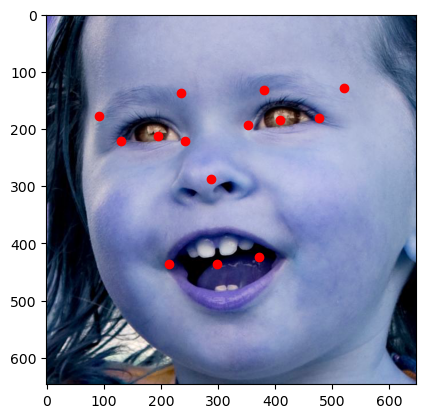

In [12]:
# plot image and features in same plot
plt.imshow(sample_file)
plt.scatter(points_x, points_y, c='red')

In [13]:
def flat_to_points(array):
    if isinstance(array, np.ndarray):
        array = torch.from_numpy(array)
    return torch.reshape(array, (14, 2))

In [14]:
# define function to get the image feature from the dataframe
def get_feature(filename, features_df, get_points=False):
    """
    Returns the image feature of the file from features dataframe as tensor
    """

    feature = features_df[features_df['filename']==filename].drop(columns='filename').to_numpy().flatten()

    # separate the features as two lists (points_x and points_y) if get_points is True
    if get_points:
        points = flat_to_points(feature)
        return points
    
    # else return as a single list
    return torch.from_numpy(feature)

In [15]:
feats = get_feature(files[0], features_df, False)
feats_points = get_feature(files[0], features_df, True)
feats_resized = flat_to_points(feats)
feats_flatten = torch.flatten(feats_points)

feats, feats_points, feats_resized, feats_flatten

(tensor([ 91, 176, 235, 136, 380, 132, 520, 128, 131, 220, 195, 212, 243, 220,
         352, 192, 408, 184, 476, 180, 287, 288, 215, 436, 299, 436, 372, 424]),
 tensor([[ 91, 176],
         [235, 136],
         [380, 132],
         [520, 128],
         [131, 220],
         [195, 212],
         [243, 220],
         [352, 192],
         [408, 184],
         [476, 180],
         [287, 288],
         [215, 436],
         [299, 436],
         [372, 424]]),
 tensor([[ 91, 176],
         [235, 136],
         [380, 132],
         [520, 128],
         [131, 220],
         [195, 212],
         [243, 220],
         [352, 192],
         [408, 184],
         [476, 180],
         [287, 288],
         [215, 436],
         [299, 436],
         [372, 424]]),
 tensor([ 91, 176, 235, 136, 380, 132, 520, 128, 131, 220, 195, 212, 243, 220,
         352, 192, 408, 184, 476, 180, 287, 288, 215, 436, 299, 436, 372, 424]))

In [16]:
features = features_df.to_numpy()
features[:5, :5]

array([['00000.jpg', 51, 51, 127, 60],
       ['00001.jpg', 21, 20, 36, 18],
       ['00002.jpg', 23, 116, 39, 83],
       ['00003.jpg', 29, 18, 63, 25],
       ['00004.jpg', 31, 53, 76, 44]], dtype=object)

In [17]:
# resizing with pytorch

resize_transform = v2.Resize(size=(256, 256))

image_tensor = torch.from_numpy(sample_file).permute(2, 0, 1)

resized_tensor = resize_transform(image_tensor)
resized_tensor.shape, image_tensor.shape

(torch.Size([3, 256, 256]), torch.Size([3, 647, 647]))

In [18]:
# define function to resize image and features

def resize_data(image, feature, target_size=(256, 256)):
    image_size = image.shape
    scalef_x, scalef_y = target_size[0]/image_size[0], target_size[1]/image_size[1]


    

In [19]:
# custom transfom to resize image and features

class ResizeImageAndFeature:
    def __init__(self, size):
        self.size = size
        self.transform = v2.Compose([v2.Resize(size)])

    def __call__(self, image, feature):
        image_size = image.shape
        # print(f"image_size = {image_size}")
        transformed_image = self.transform(image) / 255.0

        transformed_feature = self.resize_feature(feature, image_size, self.size)

        return transformed_image, transformed_feature
    
    def resize_feature(self, feature, image_size, size):
        scale_x, scale_y = size[1]/image_size[-1], size[0]/image_size[-2] # tensor could be of shape (B, C, H, W) H->y, W->x
        # print(f"scale_x, y = {scale_x, scale_y}, image_size[-2], [-1] = {image_size[-2], image_size[-1]}, \nimage_size={image_size}, size={size}")
        transformed_feature = feature.to(float).clone()
        # print(f"transformed_feature.shape={transformed_feature.shape}")
        if len(transformed_feature.shape) == 2: # for (x, y), just for testing transformation
            transformed_feature[:, 0] = (transformed_feature[:, 0] * scale_x).to(torch.int)
            transformed_feature[:, 1] = (transformed_feature[:, 1] * scale_y).to(torch.int)
        
        elif len(transformed_feature.shape) == 3: # for (B, x, y)
            transformed_feature[:, :, 0] = (transformed_feature[:, 0] * scale_x).to(torch.int)
            transformed_feature[:, :, 1] = (transformed_feature[:, 1] * scale_y).to(torch.int)
        
        else:
            raise Exception("Features shape not compatible")

        return transformed_feature

In [20]:
# test the resize transform
feature_tensor = get_feature(files[0], features_df, True)


resize_both_transform = ResizeImageAndFeature((256, 256))

resized_image, resized_feature = resize_both_transform(image_tensor, feature_tensor)

resized_image.shape, resized_feature.shape

(torch.Size([3, 256, 256]), torch.Size([14, 2]))

In [21]:
len(feature_tensor.shape)

2

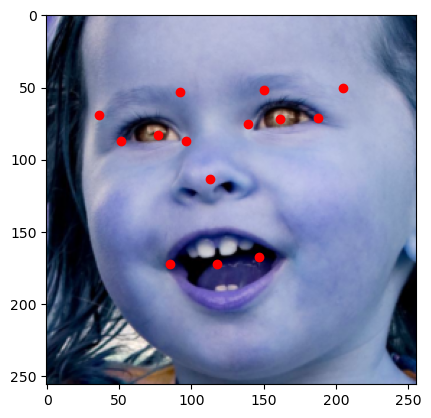

In [22]:
# plot the resized image
plt.imshow(resized_image.permute(1, 2, 0))
plt.scatter(resized_feature[:, 0], resized_feature[:, 1], c='red')

In [23]:
# try smallar image
test_image_file = '04343.jpg'
test_image = cv2.imread(os.path.join(image_path, test_image_file))
test_image_tensor = torch.from_numpy(test_image).permute(2, 0, 1)

test_image_feature = get_feature(test_image_file, features_df, True)

resized_image, resized_feature = resize_both_transform(test_image_tensor, test_image_feature)

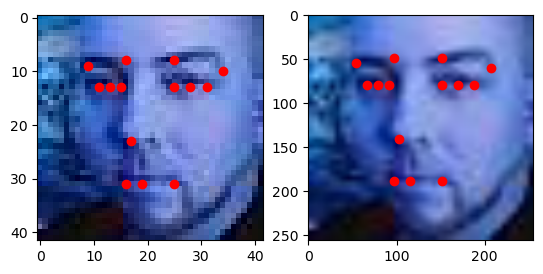

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(test_image)
axes[0].scatter(test_image_feature[:, 0], test_image_feature[:, 1], c='red')

axes[1].imshow(resized_image.permute(1, 2, 0))
axes[1].scatter(resized_feature[:, 0], resized_feature[:, 1], c='red')

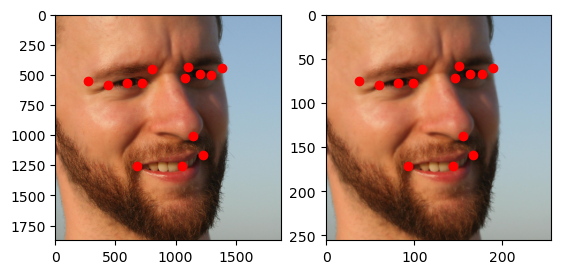

In [25]:
# try larger image
test_image_file = '00023.jpg'
test_image = cv2.cvtColor(cv2.imread(os.path.join(image_path, test_image_file)), cv2.COLOR_BGR2RGB)
test_image_tensor = torch.from_numpy(test_image).permute(2, 0, 1)
test_image_feature = get_feature(test_image_file, features_df, True)

resized_image, resized_feature = resize_both_transform(test_image_tensor, test_image_feature)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(test_image)
axes[0].scatter(test_image_feature[:, 0], test_image_feature[:, 1], c='red')

axes[1].imshow(resized_image.permute(1, 2, 0))
axes[1].scatter(resized_feature[:, 0], resized_feature[:, 1], c='red')

In [26]:
# function to get pytorch tensor from numpy image data

def file_to_tensor(filepath):
    """
    Take file path to a single image file and returns a tensor in pytorch format (C, H, W)
    """

    image_np = cv2.imread(filepath)
    image_tensor = torch.from_numpy(image_np).permute(2, 0, 1)

    return image_tensor


In [27]:
a = torch.empty(1, 3, 256, 256)
b = torch.randn(1, 3, 256, 256)

a = torch.concat((a, b), dim=0)
a.shape

torch.Size([2, 3, 256, 256])

In [28]:
# read all the images and their features

def read_data(images_path, features_df, transform=None):
    """
    Traverse through the dataset path and read all the images and then read the respective feature
    """

    # set the height and width of image
    HEIGHT, WIDTH = 256, 256

    
    files = os.listdir(images_path)
    n_files = len(files) # total number of files (batch dim)
    n_channels = 3 # number of channel for each image (channel dim)
    feature_len = 28 # number of feature columns (14*2)
    invalid_files_num = 0
    data_array = torch.empty(n_files, n_channels, HEIGHT, WIDTH)
    features_array = torch.empty(n_files, feature_len)
    for i in range(len(files)):
        image_tensor = file_to_tensor(os.path.join(images_path, files[i]))

        # find the height and width of image
        _, img_height, img_width = image_tensor.shape
        feature_tensor = get_feature(files[i], features_df, True)
        
        # transform the data if given
        if transform is not None:
            image_tensor, feature_tensor = transform(image_tensor, feature_tensor)
        image_tensor = image_tensor.reshape(1, 3, 256, 256)
        feature_tensor = feature_tensor.reshape(1, 28)
        if feature_tensor.max() > 255 or feature_tensor.min() < 0:
            invalid_files_num += 1
            print(f"Invalid feature for file={files[i]}, index={i}")
        data_array[i] = image_tensor
        features_array[i] = feature_tensor
    print(f"{invalid_files_num} invalid features found")

        # print(image_tensor.shape, feature_tensor.shape)
    return data_array, features_array


In [29]:
data_X, data_y = read_data(image_path, features_df, resize_both_transform)
data_X.shape, data_y.shape

Invalid feature for file=01483.jpg, index=5460
1 invalid features found


(torch.Size([6000, 3, 256, 256]), torch.Size([6000, 28]))

In [30]:
 #checking some feature values
test_index = 5460

data_y[test_index].reshape((14, 2))

tensor([[ 74.,  65.],
        [104., 102.],
        [155., 123.],
        [214., 132.],
        [ 95.,  53.],
        [109.,  65.],
        [128.,  69.],
        [174.,  90.],
        [188., 100.],
        [211., 107.],
        [155.,  34.],
        [160., -25.],
        [183., -16.],
        [214.,  -4.]])

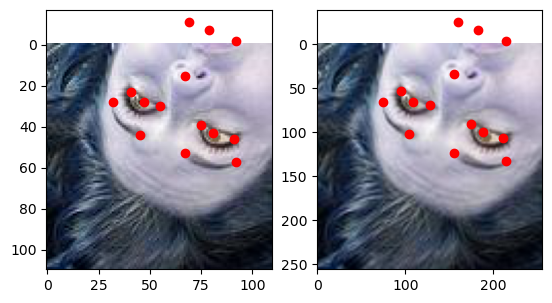

In [31]:
test_image_file = '01483.jpg'
test_image = cv2.imread(os.path.join(image_path, test_image_file))
test_image_tensor = torch.from_numpy(test_image).permute(2, 0, 1)

test_image_feature = get_feature(test_image_file, features_df, True)

resized_image, resized_feature = resize_both_transform(test_image_tensor, test_image_feature)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(test_image)
axes[0].scatter(test_image_feature[:, 0], test_image_feature[:, 1], c='red')

axes[1].imshow(resized_image.permute(1, 2, 0))
axes[1].scatter(resized_feature[:, 0], resized_feature[:, 1], c='red')

One image contains features that are out of the image size

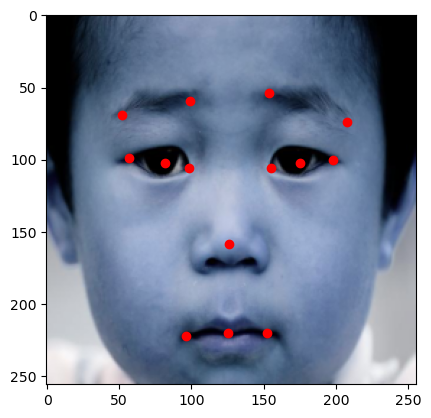

In [32]:
# check if the transformations work
test_index = 1904
test_image = data_X[test_index].reshape(3, 256, 256).permute(1, 2, 0)
plt.imshow(test_image)
points = data_y[test_index].reshape(14, 2)
plt.scatter(points[:, 0], points[:, 1], c='red')

In [33]:
torch.max(test_image), torch.min(test_image)

(tensor(0.9843), tensor(0.))

In [34]:
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch import nn
from torchsummary import summary

In [35]:
# convert tensors into tensor dataset
data_Xy = TensorDataset(data_X, data_y)

In [36]:
len(data_Xy)

6000

In [37]:
# function to split into train test and validation datasets
seed = 2024


def train_test_split(data_Xy, train_split=0.85):
    # set seed
    torch.manual_seed(seed)
    np.random.seed(seed)

    total_samples = len(data_Xy)
    train_samples = int(total_samples * train_split) # number of samples in training data
    test_samples = total_samples - train_samples # number of samples in testing data

    train_data, test_data = random_split(data_Xy, [train_samples, test_samples])

    return train_data, test_data


In [38]:
# divide into training data and testing data
train_dataset, test_data = train_test_split(data_Xy)

In [39]:
len(train_dataset), len(test_data)

(5100, 900)

In [40]:
# divide train_dataset into train_data and val_data

train_data, val_data = train_test_split(train_dataset)

len(train_data), len (val_data)

(4335, 765)

In [41]:
torch.manual_seed(seed)
np.random.seed(seed)

# set up dataloaders
batch_size = 32

train_loader = DataLoader(train_data, batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_data, batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size, shuffle=True, drop_last=True)

In [42]:
# set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


In [90]:
# define CNN model

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding='same')
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.relu1 = nn.ReLU()
        self.mx_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding='same')
        self.bn2 = nn.BatchNorm2d(num_features=64)
        self.relu2 = nn.ReLU()
        self.mx_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
        self.bn3 = nn.BatchNorm2d(num_features=128)
        self.relu3 = nn.ReLU()
        self.mx_pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=32*32*128, out_features=100)
        self.relu_fc1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=100, out_features=100)
        self.relu_fc2 = nn.ReLU()

        self.out = nn.Linear(in_features=100, out_features=28)

        self.relu_out = nn.ReLU()


    def forward(self, X):
        X = self.mx_pool1(self.relu1(self.bn1(self.conv_1(X))))
        X = self.mx_pool2(self.relu2(self.bn2(self.conv_2(X))))
        X = self.mx_pool3(self.relu3(self.bn3(self.conv_3(X))))
        X = torch.flatten(X, start_dim=1)
        X = self.relu_fc1(self.fc1(X))
        X = self.relu_fc2(self.fc2(X))
        X = self.relu_out(self.out(X))

        return X

In [91]:
model = CNNModel()

summary(model, (3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 256, 256]        448
├─BatchNorm2d: 1-2                       [-1, 16, 256, 256]        32
├─ReLU: 1-3                              [-1, 16, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 16, 128, 128]        --
├─Conv2d: 1-5                            [-1, 64, 128, 128]        9,280
├─BatchNorm2d: 1-6                       [-1, 64, 128, 128]        128
├─ReLU: 1-7                              [-1, 64, 128, 128]        --
├─MaxPool2d: 1-8                         [-1, 64, 64, 64]          --
├─Conv2d: 1-9                            [-1, 128, 64, 64]         73,856
├─BatchNorm2d: 1-10                      [-1, 128, 64, 64]         256
├─ReLU: 1-11                             [-1, 128, 64, 64]         --
├─MaxPool2d: 1-12                        [-1, 128, 32, 32]         --
├─Linear: 1-13                           [-1, 100]                 13,107,3

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 256, 256]        448
├─BatchNorm2d: 1-2                       [-1, 16, 256, 256]        32
├─ReLU: 1-3                              [-1, 16, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 16, 128, 128]        --
├─Conv2d: 1-5                            [-1, 64, 128, 128]        9,280
├─BatchNorm2d: 1-6                       [-1, 64, 128, 128]        128
├─ReLU: 1-7                              [-1, 64, 128, 128]        --
├─MaxPool2d: 1-8                         [-1, 64, 64, 64]          --
├─Conv2d: 1-9                            [-1, 128, 64, 64]         73,856
├─BatchNorm2d: 1-10                      [-1, 128, 64, 64]         256
├─ReLU: 1-11                             [-1, 128, 64, 64]         --
├─MaxPool2d: 1-12                        [-1, 128, 32, 32]         --
├─Linear: 1-13                           [-1, 100]                 13,107,3

In [45]:
# define function to return accuracy of prediction tensor
def accuracy(preds: torch.tensor, labels: torch.tensor):
    labels = labels*255
    preds = torch.round(preds*255).int()

    accuracy = torch.mean((preds == labels).float())

    return accuracy

In [46]:
# define function to train model

def train(dataloader, model, optimizer, loss_fn, metric_fn):
    # set seed
    torch.manual_seed(seed)
    np.random.seed(seed)

    # set model to device
    model.to(device)
    num_batches = len(dataloader)
    running_loss = 0
    accuracy = 0

    for batch, (X, y) in enumerate(dataloader):
        
        
        
        # set data to device
        X = X.to(device)
        y = y.to(device)

        # zero grad optimizer for each batch
        optimizer.zero_grad()

        # make predictions
        y_hat = model(X)

        # compute loss and gradients
        loss= loss_fn(y, y_hat)
        loss.backward()

        # calculate accuracy
        accuracy += metric_fn(y, y_hat)

        # adjust learning weights
        optimizer.step()

        # gather the losses
        running_loss += loss.item()

        print(f"Batch: {batch+1}/{num_batches}, Avg Loss: {running_loss/(batch+1):7f}, Avg Accuracy: {accuracy/(batch+1):5f}", end='\r')

    return running_loss

In [47]:
# define testing function
def test(dataloader, model, loss_fn, metric_fn):
    num_batches = len(dataloader)
    test_loss = 0
    test_accuracy = 0

    model.to(device)
    model.eval()
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            
            X = X.to(device)
            y = y.to(device)

            y_hat = model(X)

            test_loss += loss_fn(y_hat, y)
            test_accuracy += metric_fn(y_hat, y)
    
    test_loss /= num_batches
    test_accuracy /= num_batches

    print(f"loss: {test_loss:7f}, test accuracy: {test_accuracy:7f}")

In [92]:
# training the model

model = CNNModel()
epochs = 25
loss_fn = nn.MSELoss()
accuracy_fn = accuracy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    print(f"Epoch: {epoch+1}")
    train(train_loader, model, optimizer, loss_fn, accuracy_fn)
    print("\nValidation")
    test(val_loader, model, loss_fn, accuracy_fn)

Epoch: 1
Batch: 135/135, Avg Loss: 2830.452027, Avg Accuracy: 0.000008
Validation
loss: 2218.354248, test accuracy: 0.000194
Epoch: 2
Batch: 135/135, Avg Loss: 2212.283921, Avg Accuracy: 0.000008
Validation
loss: 2205.200684, test accuracy: 0.000097
Epoch: 3
Batch: 135/135, Avg Loss: 2191.045886, Avg Accuracy: 0.000008
Validation
loss: 2188.517090, test accuracy: 0.000049
Epoch: 4
Batch: 135/135, Avg Loss: 2178.318336, Avg Accuracy: 0.000008
Validation
loss: 2180.541992, test accuracy: 0.000243
Epoch: 5
Batch: 135/135, Avg Loss: 2165.287717, Avg Accuracy: 0.000008
Validation
loss: 2178.166748, test accuracy: 0.000049
Epoch: 6
Batch: 135/135, Avg Loss: 2155.064797, Avg Accuracy: 0.000008
Validation
loss: 2182.028076, test accuracy: 0.000146
Epoch: 7
Batch: 135/135, Avg Loss: 2146.306038, Avg Accuracy: 0.000008
Validation
loss: 2174.288330, test accuracy: 0.000097
Epoch: 8
Batch: 135/135, Avg Loss: 2137.016806, Avg Accuracy: 0.000008
Validation
loss: 2163.449463, test accuracy: 0.000437


In [93]:
test_images, test_labels = next(iter(test_loader))

test_images.shape, test_labels.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 28]))

In [94]:
test_preds = model(test_images.to(device))

test_preds.shape

torch.Size([32, 28])

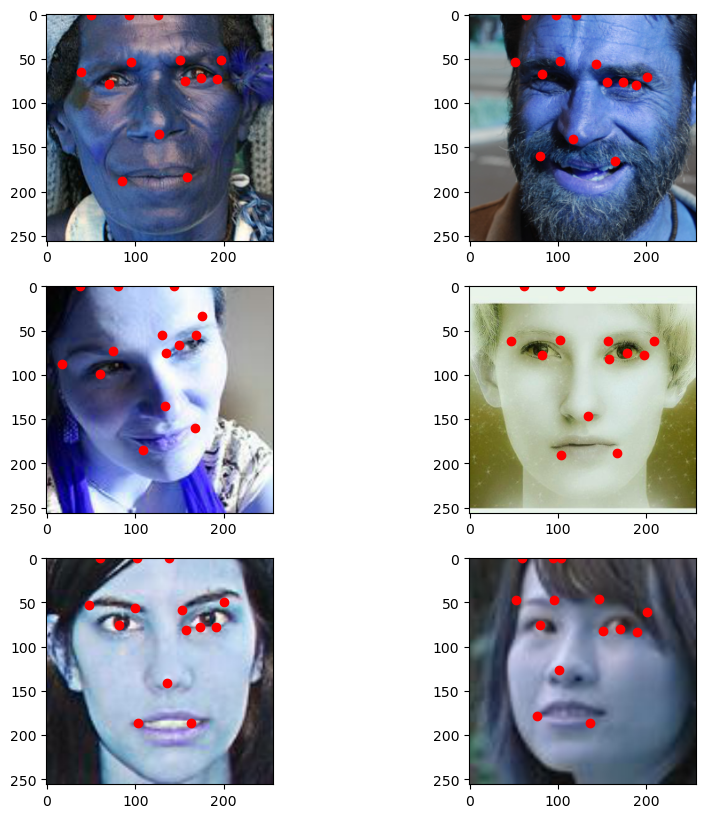

In [95]:
# plot models output on a test image
test_indices = np.random.choice(np.arange(0, 32), size=6, replace=False)

rows = 3
cols = 2
fig, axes =  plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))

for row in range(rows):
    for col in range(cols):
        index = row*cols + col
        test_index = test_indices[index]

        test_image = test_images[test_index].permute(1, 2, 0)

        test_pred = test_preds[test_index].detach().reshape((14, 2)).cpu()

        axes[row, col].imshow(test_image)
        axes[row, col].scatter(test_pred[:, 0], test_pred[:, 1], c='red')

# test_pred

While most of the features predicted by the model seems okay, some features are clipped to 0 as seen in the test image.

Accuracy as a metric for the models performance is not suitable as seen in the experiment because there are less chances that the models prediction would be exactly as the feature label.

Also, the models loss is high since MSE is used and the output values are large (0 to 255)